In [1]:
import numpy as np
import pandas as pd

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
from sklearn.impute import SimpleImputer 

# models
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.metrics import classification_report

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

RANDOM_SEED = 20240417

In [2]:
df = pd.read_csv('DT_bank_marketing.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
for col in df.columns:
    if pd.api.types.is_object_dtype(df[col]):
        print(f'{col}: {" ".join(df[col].unique())}')

job: admin. technician services management retired blue-collar unemployed entrepreneur housemaid unknown self-employed student
marital: married single divorced
education: secondary tertiary primary unknown
default: no yes
housing: yes no
loan: no yes
contact: unknown cellular telephone
month: may jun jul aug oct nov dec jan feb mar apr sep
poutcome: unknown other failure success
deposit: yes no


duration - duration of a phone call
campaign - the number of times the marketing company called the client

In [6]:
imputer = SimpleImputer(strategy='most_frequent') 
pd.DataFrame(imputer.fit_transform(df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
target_feature = 'deposit'
cat_features = [col for col in df.columns if col != target_feature and pd.api.types.is_object_dtype(df[col])]
numeric_features = [col for col in df.columns if col != target_feature and col not in cat_features]

In [8]:
onehot_encoder = OneHotEncoder()    
encoded_features = onehot_encoder.fit_transform(df[cat_features])
encoded_features_name = onehot_encoder.get_feature_names_out(cat_features)
encoded_features_name

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [9]:
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_features_name, dtype=int)
encoded_df = pd.concat([df[numeric_features], encoded_df], axis=1)
encoded_df[target_feature] = df[target_feature]
encoded_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,yes
1,56,45,5,1467,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,yes
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,yes
3,55,2476,5,579,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,yes
4,54,184,5,673,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,yes


In [10]:
encoded_df[target_feature] = np.where(df[target_feature] == 'yes', 1, 0)
encoded_df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11158,39,733,16,83,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11160,43,0,8,9,2,172,5,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [11]:
encoded_df[target_feature].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: deposit
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


In [12]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

---

In [13]:
print([col for col in encoded_df.columns if 'deposit' in col])
df['deposit']

['deposit']


0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [14]:
X, y = encoded_df[encoded_df.columns[:-1]].values, encoded_df['deposit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [15]:
dt_1 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=15,
                              min_samples_split=7,
                              min_samples_leaf=3,
                              max_leaf_nodes=50,
                              random_state=RANDOM_SEED)

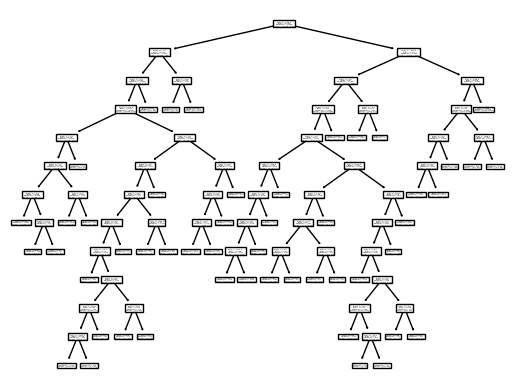

In [33]:
plot_tree(dt_1)
plt.show()

In [17]:
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=50, min_samples_leaf=3,
                       min_samples_split=7, random_state=20240417)

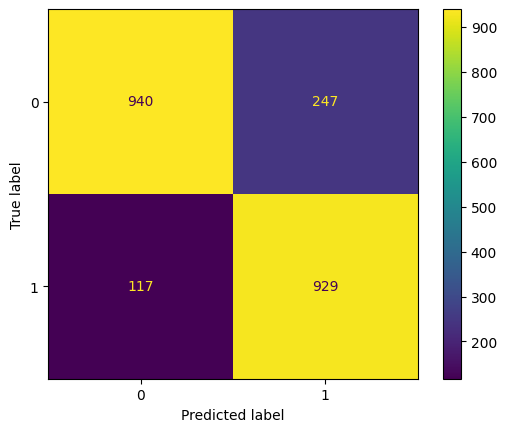

In [18]:
prediction = dt_1.predict(X_test)
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [19]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1187
           1       0.79      0.89      0.84      1046

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [20]:
dt_1.feature_importances_

array([0.01868346, 0.0231003 , 0.02092992, 0.49777091, 0.00312043,
       0.02346028, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03618199, 0.02284719,
       0.        , 0.        , 0.        , 0.        , 0.1019045 ,
       0.01475268, 0.00947658, 0.        , 0.00882969, 0.00302168,
       0.00659788, 0.01054587, 0.03769064, 0.00380604, 0.00368312,
       0.02326151, 0.        , 0.        , 0.        , 0.12745265,
       0.00288266])

In [21]:
important_indexes = np.array([i for i, val in enumerate(dt_1.feature_importances_) if val != 0])
nonimportant_indexes = np.array([i for i, val in enumerate(dt_1.feature_importances_) if val == 0])
print('important:\t', len(encoded_df.columns[important_indexes]))
print('not important:\t', len(encoded_df.columns[nonimportant_indexes]))

important:	 21
not important:	 30


<Axes: xlabel='duration', ylabel='Count'>

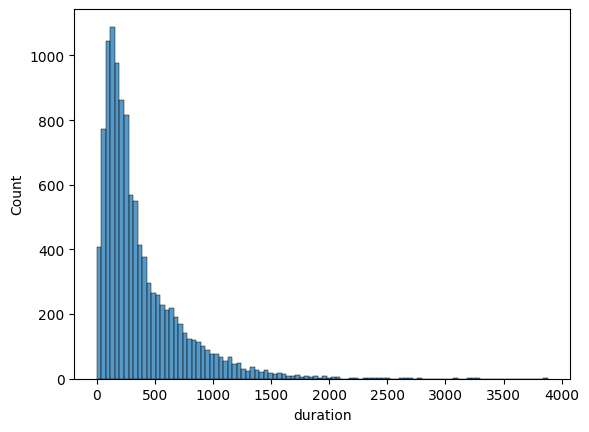

In [22]:
sns.histplot(encoded_df['duration'], bins=100)

In [23]:
len(numeric_features)

7

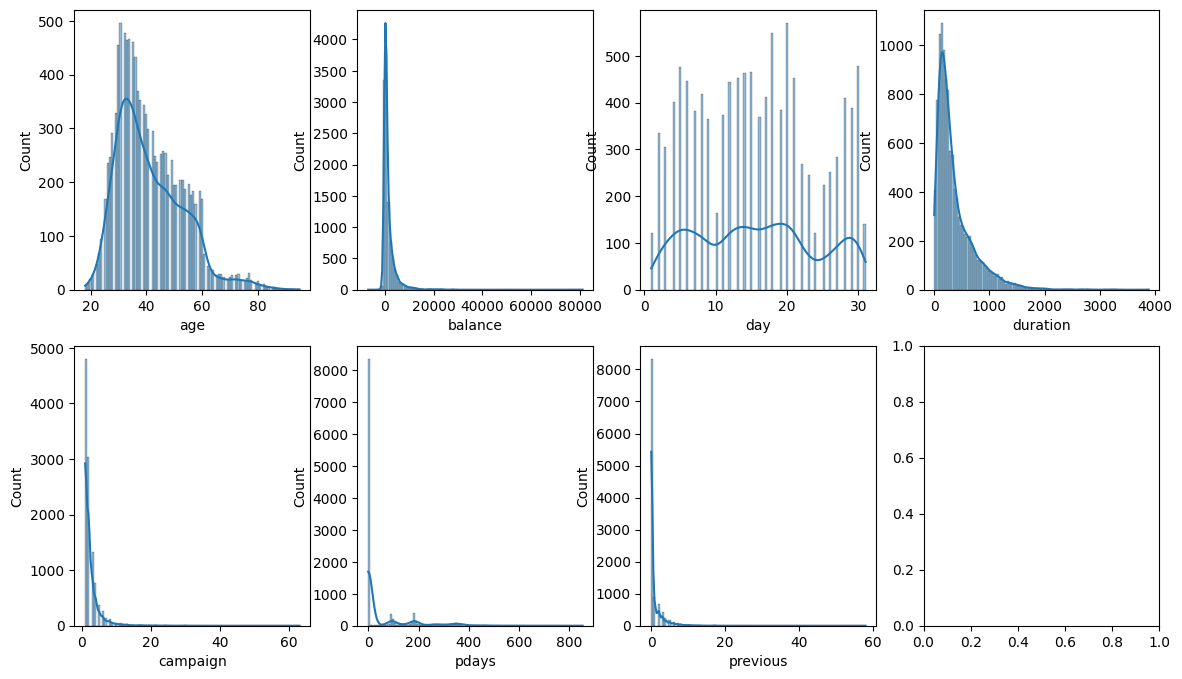

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(14,8))

for idx, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, bins=100, ax=axs[idx//4, idx%4])
plt.show()

<Axes: >

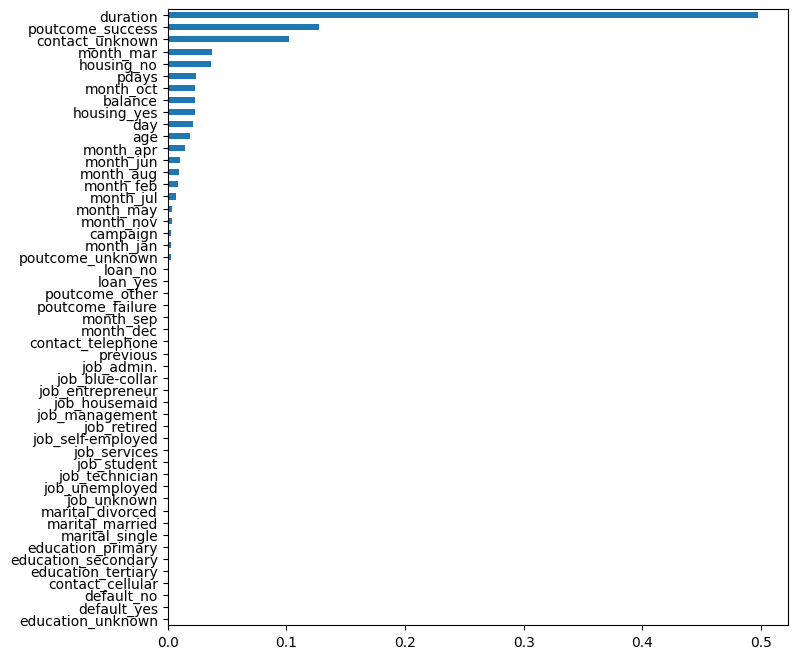

In [29]:
pd.Series(dt_1.feature_importances_, index=encoded_df.columns[:-1]).sort_values().plot.barh(figsize=(8,8))

In [31]:
encoded_df[df['contact'] == 'unknown']['deposit'].mean()

0.2259164535379369

In [32]:
encoded_df[df['contact'] == 'cellular']['deposit'].mean()

0.5432728177070381

---

In [34]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_reg = LogisticRegression(max_iter=10**4, penalty='l2')

In [45]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

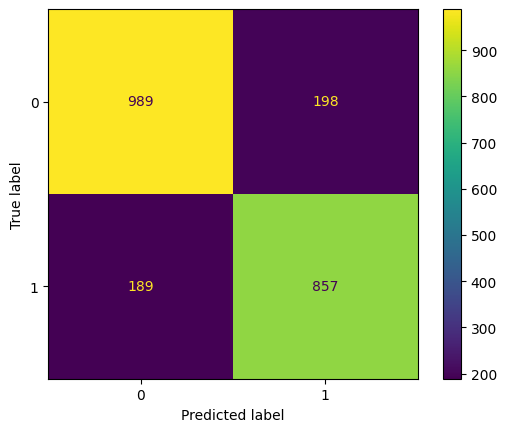

In [46]:
prediction = log_reg.predict(X_test)
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [40]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1187
           1       0.81      0.82      0.82      1046

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



--- 
Forest

# hokkey ranking

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=27,
    # min_samples_leaf=3,
    # max_leaf_nodes=50,
    random_state=RANDOM_SEED
)

In [83]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=27, random_state=20240417)

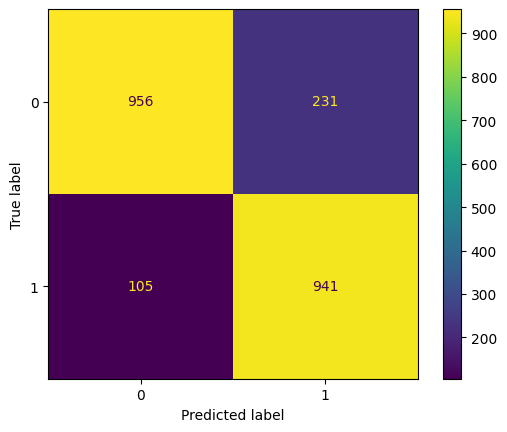

In [84]:
prediction = rf.predict(X_test)
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [85]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1187
           1       0.80      0.90      0.85      1046

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.86      0.85      0.85      2233

